In [2]:
import pandas as np
a=np.read_csv("/content/bike_sales_100k (1).csv")
print(a)

       Sale_ID        Date  Customer_ID     Bike_Model    Price  Quantity  \
0            1  11-07-2022         9390        Cruiser   318.32       1.0   
1            2  03-05-2024         3374    Hybrid Bike  3093.47       4.0   
2            3  01-09-2022         2689   Folding Bike  4247.99       3.0   
3            4  28-09-2022         3797  Mountain Bike  1722.01       3.0   
4            5  05-01-2021         1633            BMX  3941.44       3.0   
...        ...         ...          ...            ...      ...       ...   
55517    55518  20-06-2021         7028    Hybrid Bike  4196.14       1.0   
55518    55519  24-02-2023         7255  Mountain Bike  2692.85       1.0   
55519    55520  27-04-2020         6628  Electric Bike   527.00       5.0   
55520    55521  09-06-2022         6882    Hybrid Bike  4278.75       5.0   
55521    55522  03-04-2023            2            NaN      NaN       NaN   

      Store_Location  Salesperson_ID Payment_Method  Customer_Age  \
0     

In [3]:
a.isnull().sum()

Sale_ID            0
Date               0
Customer_ID        0
Bike_Model         1
Price              1
Quantity           1
Store_Location     1
Salesperson_ID     1
Payment_Method     1
Customer_Age       1
Customer_Gender    1
dtype: int64

In [9]:
a["Bike_Model"]=a["Bike_Model"].fillna("0")
a["Price"]=a["Price"].fillna(0)
a["Quantity"]=a["Quantity"].fillna(0)
a["Store_Location"]=a["Store_Location"].fillna("0")
a["Salesperson_ID"]=a["Salesperson_ID"].fillna(0)
a["Payment_Method"]=a["Payment_Method"].fillna("0")
a["Customer_Age"]=a["Customer_Age"].fillna(0)
a["Customer_Gender"]=a["Customer_Gender"].fillna("0")

In [10]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
a["Bike_Model"]=b.fit_transform(a["Bike_Model"])
a["Store_Location"]=b.fit_transform(a["Store_Location"])
a["Payment_Method"]=b.fit_transform(a["Payment_Method"])
a["Customer_Gender"]=b.fit_transform(a["Customer_Gender"])
a["Date"]=b.fit_transform(a["Date"])


print(a)

       Sale_ID  Date  Customer_ID  Bike_Model    Price  Quantity  \
0            1   602         9390           1   318.32       1.0   
1            2   138         3374           4  3093.47       4.0   
2            3    42         2689           3  4247.99       3.0   
3            4  1576         3797           5  1722.01       3.0   
4            5   229         1633           0  3941.44       3.0   
...        ...   ...          ...         ...      ...       ...   
55517    55518  1109         7028           4  4196.14       1.0   
55518    55519  1318         7255           5  2692.85       1.0   
55519    55520  1493         6628           2   527.00       5.0   
55520    55521   483         6882           4  4278.75       5.0   
55521    55522   132            2           7     0.00       0.0   

       Store_Location  Salesperson_ID  Payment_Method  Customer_Age  \
0                   4           589.0               0          70.0   
1                   0           390.0    

<BarContainer object of 55522 artists>

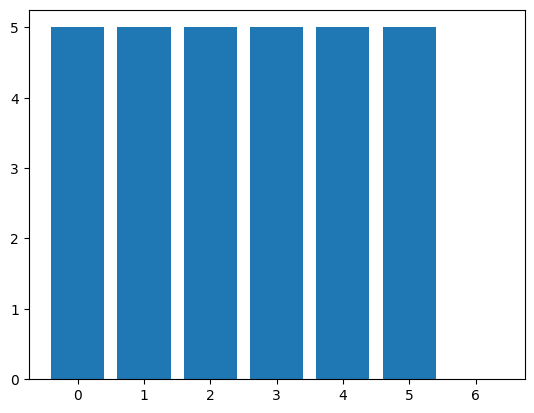

In [11]:
from matplotlib import pyplot as plt
plt.bar(a["Payment_Method"],a["Quantity"])

In [16]:
x=a.drop("Quantity",axis=1)
y=a["Quantity"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)
print(xtrain)
print(ytrain)

       Sale_ID  Date  Customer_ID  Bike_Model    Price  Store_Location  \
3986      3987  1385         3143           4  4382.12               6   
16267    16268  1208         6968           4  1255.07               2   
16847    16848    21         3674           4  1687.75               3   
6199      6200  1152         4775           2  2060.17               0   
23253    23254   798         1741           3  3419.78               3   
...        ...   ...          ...         ...      ...             ...   
19938    19939   522         9009           1  4746.94               3   
26490    26491   857         9873           5  4625.17               3   
25630    25631  1137         8331           3  1148.82               1   
7006      7007  1615         8917           0  2767.43               3   
1511      1512   250         3326           0  1181.22               5   

       Salesperson_ID  Payment_Method  Customer_Age  Customer_Gender  
3986            129.0               5   

In [17]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
data=br.predict([[100001,9,10000,8,3,6,4071,0,50,1]])
print(data)

[2.]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[195 302 703 527 475]
 [177 312 682 555 496]
 [212 293 697 525 460]
 [220 295 690 511 507]
 [229 315 712 525 490]]


In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.1985592075641603


In [21]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.19      0.09      0.12      2202
         2.0       0.21      0.14      0.17      2222
         3.0       0.20      0.32      0.25      2187
         4.0       0.19      0.23      0.21      2223
         5.0       0.20      0.22      0.21      2271

    accuracy                           0.20     11105
   macro avg       0.20      0.20      0.19     11105
weighted avg       0.20      0.20      0.19     11105

